In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Image_Data="/content/drive/MyDrive/Data"
Data_Directory=os.listdir(Image_Data)
print(Data_Directory)

['with_mask', 'without_mask']


Converting the images into Grey scale image to reduce computation time used by Model

In [4]:
image_list=[]


for category in Data_Directory:
    folder_path=os.path.join(Image_Data,category)
    for image in os.listdir(folder_path):
        image_path=os.path.join(folder_path,image)
        image=cv2.imread(image_path)
        grayscale_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        resized_image=cv2.resize(grayscale_image,(112,112))
            
            
        image_list.append(resized_image)
       



Normalising the Data

In [5]:
image_list=np.array(image_list)/255.0
image_list=np.reshape(image_list,(image_list.shape[0],112,112,1))

In [6]:
label1=[1]*3725
label0=[0]*3828
labelreal=label1+label0

In [7]:

labels=np.array(labelreal)
(X_tr,X_te,y_tr,y_te)=train_test_split(image_list,labels,test_size=0.5,random_state=0)

   



In [8]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
X_tr.shape

(3776, 112, 112, 1)

In [10]:
X_te.shape

(3777, 112, 112, 1)

Reshaping the data because it is supposed to be fit into ANN and ANN accepts only 1 dimensional array

In [11]:
X_tr=X_tr.reshape(-1,112*112)
X_te=X_te.reshape(-1,112*112)

In [12]:
X_tr.shape

(3776, 12544)

In [13]:
X_te.shape

(3777, 12544)

In [33]:
model = Sequential()

#Input Layer
model.add(Dense(X_tr.shape[1], activation='relu', input_dim = X_tr.shape[1]))

#Hidden Layer

model.add(Dense(3000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))


#output layer
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','mse'])

history=model.fit(X_tr, y_tr, epochs=10)

Epoch 1/10
118/118 [==============================] - 103s 865ms/step - loss: 0.7485 - accuracy: 0.5723 - mse: 0.2703
Epoch 2/10
118/118 [==============================] - 102s 863ms/step - loss: 0.6128 - accuracy: 0.6728 - mse: 0.2704
Epoch 3/10
118/118 [==============================] - 102s 864ms/step - loss: 0.5701 - accuracy: 0.7054 - mse: 0.2792
Epoch 4/10
118/118 [==============================] - 102s 868ms/step - loss: 0.5092 - accuracy: 0.7485 - mse: 0.2922
Epoch 5/10
118/118 [==============================] - 102s 868ms/step - loss: 0.5065 - accuracy: 0.7497 - mse: 0.2970
Epoch 6/10
118/118 [==============================] - 103s 870ms/step - loss: 0.4900 - accuracy: 0.7569 - mse: 0.2983
Epoch 7/10
118/118 [==============================] - 103s 871ms/step - loss: 0.4357 - accuracy: 0.7890 - mse: 0.3094
Epoch 8/10
118/118 [==============================] - 104s 883ms/step - loss: 0.4273 - accuracy: 0.7964 - mse: 0.3101
Epoch 9/10
118/118 [==============================] - 10

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12544)             157364480 
_________________________________________________________________
dense_12 (Dense)             (None, 3000)              37635000  
_________________________________________________________________
dropout_6 (Dropout)          (None, 3000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              3001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               100100    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)              

In [35]:
y_predict = model.predict(X_te)

In [18]:
predicted_class = [np.argmax(element) for element in y_predict]

In [43]:
accuracy_ANN= accuracy_score(predicted_class,y_te)
accuracy_ANN

0.8075191951284088

In [37]:
listlabels=["Masked","NotMasked"]

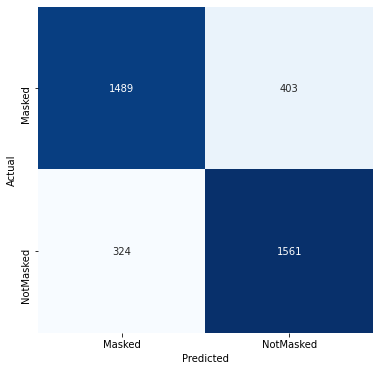

In [38]:
cm = confusion_matrix(y_te,predicted_class)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, xticklabels=listlabels, yticklabels=listlabels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
print(classification_report(y_te,predicted_class))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1892
           1       0.79      0.83      0.81      1885

    accuracy                           0.81      3777
   macro avg       0.81      0.81      0.81      3777
weighted avg       0.81      0.81      0.81      3777



In [39]:
acc      = history.history[     'accuracy' ]

loss     = history.history[    'loss' ]

In [40]:
epochs   = range(len(acc))

<Figure size 432x288 with 0 Axes>

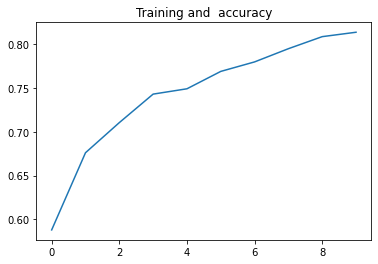

<Figure size 432x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [44]:
plt.plot  ( epochs,     acc )
plt.title ('Training and  accuracy')

plt.figure(figsize=(6,6))
plt.figure()

Text(0.5, 1.0, 'Training and  loss')

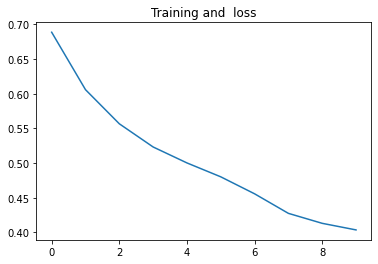

In [42]:
plt.plot  ( epochs,     loss )
plt.title ('Training and  loss'   )